In [81]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol, MatMul
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
import mpmath


In [306]:
# constants
Lc=sp.Symbol('L_c')
Lc=2 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=3.125 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [409]:
# dimensional parameters
n=sp.Symbol('n')
n=255 #CHANGEABLE
A=sp.Symbol('A')
A=-3 #CHANGEABLE
B=sp.Symbol('B')
B=9 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
C=sp.Symbol('C')
C=0.5 #CHANGEABLE
M=sp.Symbol('M')
M=1 #CHANGEABLE
#E0=h*Omega/2
#Epsilon=sp.Symbol('\varepsilon')
#Epsilon=E0*(1+2*np.linspace(0,9,10)) #\varepsilon=(1+2j)*\varepsilon_0 FOR j=0,1,...
# Epsilon

In [410]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc
# epsilon=sp.Symbol('\epsilon')
# epsilon=Epsilon/Vc
# a,b,A,B,s,S

In [411]:
# dimensional grid
Xi=sp.Symbol('X_i')
Xi=np.linspace(A,B,n)
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a,b,n)
# Xi,xi

In [412]:
# dimensional  potential
V=sp.Function('V_{QHO}')
def V(X,C):
    return Vc*(np.exp(-2*C*X)-2*np.exp(-C*X))
# non-dimensional  potential
v=sp.Function('v_{QHO}')
def v(V):
    return V/Vc
vi=sp.Symbol('v_i')
vi=v(V(Xi,C))
Vi=V(Xi,C)
#vi

In [413]:
# auxiliary variables
alpha=sp.Symbol('\alpha')
alpha=(2*M*Vc)/(C*C*h*h)
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*alpha*vi
# vit

In [414]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
# H= -1*np.eye(n,n,k=-1) + (2+(M*Omega*S*S*M*Omega*Xi*Xi)/(h*h))*np.eye(n,n) + -1*np.eye(n,n,k=1)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)
# Matrix(H)

In [415]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]
eigvec=np.linalg.eigh(H)[1]
# np.linalg.eig(H)
(eigval)[1]/(s*s*alpha)

In [416]:
# warunek unormowania
# =========================
i=0
sum=0
while i<n:
    sum=sum+(eigvec[i][0])**2 #chyba to????? (bo symetryczne)
    # sum=sum+(eigvec[0][i])**2 #?????
    i=i+1
sum
# Matrix(np.linalg.eig(H)[1][0])

In [417]:
# transpose eigvec
Psi=eigvec.T
# Matrix(Psi)

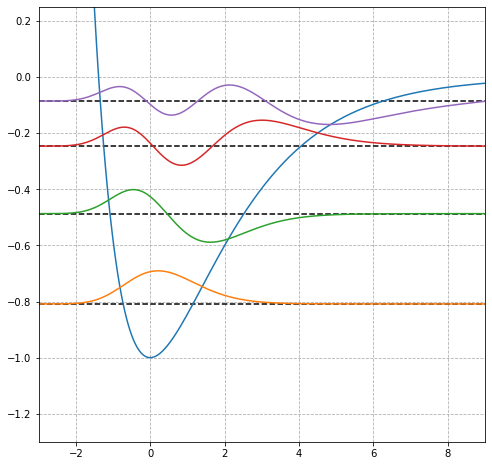

In [418]:
# graph
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(-3,9)
plt.ylim(-1.3,0.25)
plt.plot(Xi, vi)
i=0
#for i in range(0,7):
   #  plt.plot(Xi,Psi[i]+Epsilon[i])
for i in range(0,4):
    # plt.plot(Xi,Psi[i]/np.sqrt(s*np.sqrt(np.sqrt(s)))+eigval[i]/(s*s*alpha))
    if i == 0:
        plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
        plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
    else: 
        if (i % 4) == 3 or (i % 4) == 0:
            plt.plot(Xi,-Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))
            plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
        else:
            plt.plot(Xi,Psi[i]/np.sqrt(Lc)+eigval[i]/(s*s*alpha))  
            plt.hlines(eigval[i]/(s*s*alpha),A,B,color='black',ls='--')
   
    # plt.hlines(i+0.5,-2,2,color='blue')

plt.grid(ls='--')




# plt.plot(Xi,eigvec[0])
    # plt.hlines(eigval[i],-2,2,color='red')
    # plt.hlines(i+0.5,-2,2,color='blue')
# plt.plot(np.linspace(-2,2,n),[x**2 for x in np.linspace(-2,2,n)])